<a href="https://colab.research.google.com/github/geetkarthi/Internshala-EDA-/blob/main/EDA_Project_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nyc_taxi_copy.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_date'] = pd.to_datetime(df["pickup_datetime"]).dt.date
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

#df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

#duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
#duration_difference.shape

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,pickup_date
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,0,400,16:40:00,2016-02-29
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,23:35:00,2016-11-03
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,17:59:00,2016-02-21
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,09:44:00,2016-05-01
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,0,848,06:42:00,2016-02-17


In [ ]:
def Seconds():
    for i in range (0, len(df)):
        a = df['pickup_time'][i]
        tmp = a.hour*3600 + a.minute*60 + a.second
        df['pickup_time'][i] = tmp
Seconds()

In [ ]:
def Date():
    for i in range (0, len(df)):
        dat = df['pickup_date'][i]
        d = dat.month
        df['pickup_date'][i] = d
Date()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,pickup_date
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,0,400,60000,2
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,84900,11
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,64740,2
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,35040,5
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,0,848,24120,2


In [ ]:
x = df.drop(["trip_duration", "id", "pickup_datetime", "dropoff_datetime"], axis = 1)
y = df["trip_duration"]
x.shape, y.shape

((2500, 9), (2500,))

In [ ]:
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_time,pickup_date
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,60000,2
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,84900,11
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,64740,2
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,35040,5
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,24120,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 61)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(train_x, train_y)
train_predict = classifier.predict(train_x)
train_error = mae(train_predict, train_y)
print(train_error)    

0.0


In [ ]:
test_predict = classifier.predict(test_x)
test_error = mae(test_predict, test_y)  
print(test_error)

672.0352


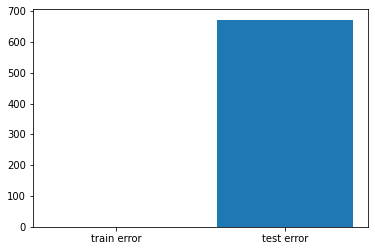

In [ ]:
a = ["train error", "test error"]
b = [train_error, test_error]
plt.bar(a, b)
plt.show()